# Introdução ao Colab

O Google Colab é um ambiente de desenvolvimento em nuvem fornecido pelo Google. Ele fornece um ambiente de programação na Linguagem Python baseado no editor [Jupyter](https://jupyter.org/). Ele combina código e documentação de texto, e é muito útil para prototipagem e ensino de computação.

O ambiente de computação do Colab usa máquinas vírtuais voláteis, mas os resultados da computação são salvos em um documento do Google Drive. Então os resultados de execução ficarão salvos, mas tudo que não estiver impresso no notebook (memória, variáveis, arquivos) será perdido no fim da sessão. Lembre de salvar tudo que irá precisar ao longo da execução. Todos os usuários têm 12h de execução por dia, podendo ter a sessão interrompida por inatividade. 

Um documento do Colab é chamado Notebook (ou caderno), e notebooks são compostos por células. Células podem conter texto ou código e são executadas individualmente. Este é um exemplo de célula de texto, e abaixo temos um exemplo de célula de código. Para executar uma célula você pode clicar no campo e apertar o símbolo "Play", ou usar o atalho Ctrl + Enter.

In [1]:
1 + 1

2

Toda a célula de código executada tem abaixo a saída da última linha executada. No exemplo anterior podemos ver o resultado na computação desta linha. Impressões feitas por meio da função `print()` ou usando logs também  aparecem na saída do notebook.

In [2]:
print("Linha 1")
print("Linha 2")

"Resultado final"

Linha 1
Linha 2


'Resultado final'

Um último conceito importante é que a mémoria das células é compartilhada, mas a execução de células é sequencial, então uma célula pode depender de símbolos (variáveis, funções ou classes) definidos em células anteriores, contanto que sejam executadas na ordem correta. 

Um erro comum no Jupyter é definir algum símbolo, escrever código que depende daquele símbolo e depois apagar o código. Isso faz com que seu código execute durante o desenvolvimento, mas quando você tentar reproduzir o notebook, o seu código não vai mais funcionar.

O Colab permite executar um notebook todo de maneira sequencial usando o comando `Runtime -> Run All`. Para limpar todos os símbolos e executar o notebook de maneira sequencial, use o comando `Runtime -> Restart and Run All`.

In [3]:
a = 1

In [4]:
a + 1

2

# Introdução ao Pandas

In [5]:
import pandas as pd

<center>
<div>
<img src="https://images.rove.me/w_1920,q_85/vlrn7hkcfe5kztg7oqqo/china-giant-pandas.jpg" width="400"/>
</div>
</center>

## Onde conseguir datasets?

https://www.kaggle.com/datasets tem bastante coisa.

https://archive.ics.uci.edu/ml/index.php é uma boa opção.

https://www.imdb.com/interfaces/ nos leva ao https://datasets.imdbws.com/, que é a temática que queremos.


## Inicializando nossos dados

In [6]:
files = ('title.basics.tsv.gz', 'title.ratings.tsv.gz')
for file in files:
  !wget https://datasets.imdbws.com/{file} && gunzip {file}

--2022-09-02 18:22:28--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 13.224.2.111, 13.224.2.93, 13.224.2.116, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|13.224.2.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160706700 (153M) [binary/octet-stream]
Saving to: ‘title.basics.tsv.gz’

title.basics.tsv.gz 100%[===================>] 153.26M   174MB/s    in 0.9s    

2022-09-02 18:22:29 (174 MB/s) - ‘title.basics.tsv.gz’ saved [160706700/160706700]

--2022-09-02 18:22:34--  https://datasets.imdbws.com/title.ratings.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 13.224.2.111, 13.224.2.93, 13.224.2.116, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|13.224.2.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6296603 (6.0M) [binary/octet-stream]
Saving to: ‘title.ratings.tsv.gz’

title.ratings.tsv.g 100%[===================>]   6.00M  -

### Lendo um arquivo csv ou tsv

No caso, carregando o IMDB (`title.basics.tsv`) como um `DataFrame` do pandas.

In [7]:
df_filmes = pd.read_csv('title.basics.tsv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Uma espiada em nossos dados

<center>
<div>
<img src="https://i.ibb.co/RNxPQbv/ninja.jpg" width="400"/>
</div>
</center>

#### Head

```sql
SELECT * FROM basics LIMIT 5;
```

In [8]:
# SELECT * FROM basics LIMIT 5;
df_filmes.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


#### Tail

```sql
SELECT * FROM basics ORDER BY index DESC limit 5;
```

In [9]:
df_filmes.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9196044,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9196045,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9196046,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9196047,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
9196048,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy"


## Unique

In [11]:
df_filmes['startYear'].unique()

array(['1894', '1892', '1893', '1895', '1896', '1898', '1897', '1900',
       '1899', '1901', '1902', '1903', '1905', '1904', '1912', '1907',
       '1906', '1908', '1910', '1909', '1914', '1911', '1913', '1915',
       '1919', '1916', '1917', '1918', '1936', '1925', '1920', '1922',
       '1921', '1923', '1924', '1928', '2019', '2021', '1926', '1927',
       '1929', '2000', '1993', '1935', '1930', '1942', '1934', '1931',
       '1932', '1939', '1937', '1933', '1950', '1938', '1951', '1945',
       '1946', '1940', '1944', '1949', '1947', '1941', '1952', '1970',
       '1957', '1943', '1959', '1948', '2001', '1953', '1954', '1965',
       '1983', '1980', '1973', '1961', '1995', '1955', '1962', '1958',
       '1956', '1977', '1960', '1964', '1967', '1968', '1963', '1986',
       '1971', '1969', '1972', '1966', '1976', '1990', '2020', '1979',
       '\\N', '1974', '1978', '1981', '1988', '1975', '1989', '2014',
       '1985', '2009', '2006', '1987', '2010', '2018', '1984', '1982',
       

## Value Counts

In [12]:
df_filmes['startYear'].value_counts()

\N      1224043
2021     426995
2018     420790
2017     417739
2019     408538
         ...   
1882          2
1889          2
1874          1
1883          1
1885          1
Name: startYear, Length: 151, dtype: int64

## Dados faltantes


<center>
<div>
<img src="http://4.bp.blogspot.com/-08fhRM5mOks/TuC8U3nHlMI/AAAAAAAAAcA/bnvdNR16dRM/w1200-h630-p-k-no-nu/encontre-o-panda-escondido.jpg" width="400"/>
</div>
</center>

Substituindo os dados faltantes (`\N`) com `np.nan` na coluna `endYear`

In [16]:
import numpy as np

df_filmes['endYear'].replace('\\N', np.nan)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
9196044    NaN
9196045    NaN
9196046    NaN
9196047    NaN
9196048    NaN
Name: endYear, Length: 9196049, dtype: object

Como ficou?

In [17]:
df_filmes

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9196044,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9196045,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9196046,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9196047,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


Persistir utilizando o inplace

In [18]:
df_filmes['endYear'].replace('\\N', np.nan, inplace=True)

Uma nova espiada em nossos dados

In [19]:
df_filmes

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9196044,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,NaN,\N,"Action,Drama,Family"
9196045,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,NaN,\N,"Action,Drama,Family"
9196046,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,NaN,\N,"Action,Drama,Family"
9196047,tt9916856,short,The Wind,The Wind,0,2015,NaN,27,Short


## Groupby

<center>
<div>
<img src="https://i.chzbgr.com/full/688285440/hEF043B06/" width="400"/>
</div>
</center>

Vamos contar com o `count` quandas linhas por `titleType`

```sql
SELECT COUNT(tconst) FROM _data GROUP BY titleType;
```

In [21]:
count = df_filmes.groupby('titleType').tconst.count()
count

titleType
movie            620164
short            887178
tvEpisode       6930410
tvMiniSeries      44952
tvMovie          137383
tvPilot               2
tvSeries         230400
tvShort           10652
tvSpecial         38135
video            264732
videoGame         32041
Name: tconst, dtype: int64

Que tal ordenarmos esses valores em ordem descrescente utilizando o `sort_values`?

In [22]:
count.sort_values()

titleType
tvPilot               2
tvShort           10652
videoGame         32041
tvSpecial         38135
tvMiniSeries      44952
tvMovie          137383
tvSeries         230400
video            264732
movie            620164
short            887178
tvEpisode       6930410
Name: tconst, dtype: int64

Can we see it, graphically?

```sql
SELECT count(*) FROM basics GROUP BY titleType;
```

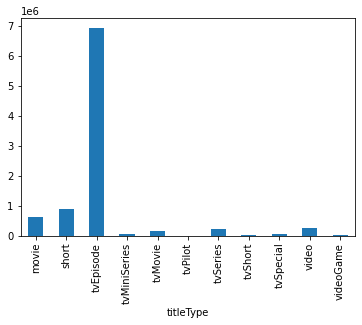

In [23]:
df_filmes.groupby('titleType').size().plot.bar()

## Merging


<center>
<div>
<img src="http://1.bp.blogspot.com/-tn-cpJv4414/UI9WGVvnsyI/AAAAAAAAAMY/w20iehBTBts/s1600/baby-panda-family-photo.jpg" width="400"/>
</div>
</center>

Antes de mergear vamos ler também a base de dados `title.ratings.tsv`

In [24]:
df_ratings = pd.read_csv('title.ratings.tsv', sep='\t')

Olhe como ficou o cabeçalho do `df_rating` DataFrame

In [25]:
df_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1908
1,tt0000002,5.8,256
2,tt0000003,6.5,1708
3,tt0000004,5.6,168
4,tt0000005,6.2,2521


Vamos ver quantas linhas e colunas o dataframe  `df_raitings` tem?

In [26]:
df_ratings.shape

(1258999, 3)

E o `df_filmes`?

In [27]:
df_filmes.shape

(9196049, 9)

Vamos dar um `merge` em `tconst`

```sql
SELECT * FROM basics b AND LEFT JOIN ratings r ON b.tconst=r.tconst;
````

In [28]:
# SELECT * FROM basics b AND LEFT JOIN ratings r ON b.tconst=r.tconst;
df = df_filmes.merge(df_ratings, how='left', on='tconst')

Vamos dar uma olhada no `df` dataframe

In [29]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short",5.7,1908.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short",5.8,256.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance",6.5,1708.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short",5.6,168.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short",6.2,2521.0


## Operações



<center>
<div>
<img src="https://pbs.twimg.com/profile_images/731944223780429824/uV0qkkN4_400x400.jpg" width="250"/>
</div>
</center>

### Selecting data

Vamos pegar as linhas em que:
* `numVotes` é maior ou igual a 100;
* `averageRating` é igual a 10.

```sql
# SELECT * FROM ... WHERE numVotes >= 100 AND averageRating = 10;
```

In [30]:
df[(df['numVotes'] >= 100) & (df['averageRating'] == 10)]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
364627,tt0380449,tvEpisode,Naomi Judd,Naomi Judd,0,2003,NaN,\N,"Biography,Documentary",10.0,191.0
366862,tt0382756,tvEpisode,Sheryl Crow,Sheryl Crow,0,2003,NaN,\N,"Biography,Documentary",10.0,187.0
372673,tt0389037,tvEpisode,Chaka Khan,Chaka Khan,0,2003,NaN,\N,"Biography,Documentary",10.0,188.0
378738,tt0395322,tvEpisode,Cloris Leachman,Cloris Leachman,0,2003,NaN,\N,"Biography,Documentary",10.0,191.0
382528,tt0399199,tvEpisode,Marian Wright Edelman,Marian Wright Edelman,0,2002,NaN,60,"Biography,Documentary",10.0,189.0
460255,tt0479077,tvEpisode,"Sarah, Duchess of York","Sarah, Duchess of York",0,2003,NaN,60,"Biography,Documentary",10.0,188.0
521337,tt0541970,tvEpisode,Life Liberty and Pursuit,Life Liberty and Pursuit,0,1999,NaN,\N,"Crime,Drama",10.0,453.0
521340,tt0541973,tvEpisode,Northern Soul,Northern Soul,0,1999,NaN,\N,"Crime,Drama",10.0,105.0
521343,tt0541976,tvEpisode,The Grace of God,The Grace of God,0,1999,NaN,\N,"Crime,Drama",10.0,388.0
581315,tt0602877,tvEpisode,Episode #1.1,Episode #1.1,0,2005,NaN,\N,"Comedy,Drama",10.0,319.0


### Drop columns

Antes de excluir qualquer coluna, vamos voltar ao `df_filmes`

In [32]:
df_filmes.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"


Vamos excluir a coluna `isAdult` (lembre de persistir com `axis`)


In [33]:
df_filmes.drop('isAdult', axis=1, inplace=True)

Vamos olhar de novo nossos dados `df_filmes` para ver se funcionou

In [34]:
df_filmes.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1893,NaN,1,"Comedy,Short"


Um pouco de Data Science :)

In [ ]:
df_filmes['runtimeMinutes'].mean()

In [ ]:
df.averageRating.plot()

In [ ]:
df.averageRating.plot(kind='hist')

In [ ]:
df.averageRating.describe()

In [ ]:
import seaborn as sns

sns.boxplot(df.averageRating)

## Data Output


<center>
<div>
<img src="https://i.ibb.co/YNYdcG3/5a24f360c50be427f4d0e6fb48d03e19.jpg" width="400"/>
</div>
</center>


Como a base de dados é muito grande, vamos selecionar apenas o `titleType` marcado como `movie`. Vamos chamar esse novo DataFrame como `df_movies`

In [36]:
df_movies = df[df['titleType'] == 'movie']

Quantas linhas e colunas temos?

In [37]:
df_movies.shape

(620164, 11)

Vamos transformar o `df_movies` como um arquivo `csv`

In [ ]:
df_movies.to_csv('movies.csv')

Checando se foi salvo mesmo

In [35]:
!ls

sample_data  title.basics.tsv  title.ratings.tsv
